### programing a virtual robot to avoide Obstacles using production Rules

 - This is a simple application of knowledge representation using production rules.
 - The goal is to move a robot from the bottem left of a board filled randomly with obstacles to the top right of the board.
 - We tried to use simple rules and avoid complex logic, therefore the set of moves are limited.
 - The robot may get stuck at a dead end as a result.
 - There is a visualisation function at the end to see the robot moving on the board.

In [1]:
import numpy as np
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
#Generate obstacles locations:
def gen_obstacles(board_length, num):
    L = board_length
    assert num< L**2, "Too many obstacles!"
    
    obs_h = np.random.choice(range(1,L+1),size=num)
    obs_v = np.random.choice(range(1,L+1),size=num)
    obstacles = {*zip(obs_h,obs_v)}

    #Remove obstacles that appear at start or goal:
    if (1, 1) in obstacles: obstacles.remove((1, 1))
    if (L, L) in obstacles: obstacles.remove((L, L))
    
    return obstacles

In [3]:
#Production Rules:
def decide(r_h, r_v, board_length, obstacles):
    L = board_length
    #If goal is reached:
    if (r_h,r_v) == (L, L): return "goal"
    
    #Moving in the middle of the board:
    #If both up and right are available, choose a random move:
    if r_h < L and r_v < L and (r_h+1,r_v) not in obstacles and (r_h,r_v+1) not in obstacles:
        return np.random.choice(["right","up"])
    
    #Moving right:
    if r_h < L and (r_h+1,r_v) not in obstacles: return "right"
    
    #moving up:
    if r_v < L and (r_h,r_v+1) not in obstacles: return "up"
    
    #If rebot reached right edge of the board and moving up is not possible, go left then up
    if (r_h == L and (r_h,r_v+1) in obstacles): return "left then up"
    
    #If rebot reached top edge of the board and moving right is not possible, go down then right
    if r_v == L and (r_h+1,r_v) in obstacles: return "down then right"
    else: return "Stuck!"
    

In [4]:
#Control Unit:
def control(r_h, r_v, decision):
    if decision == "right": return r_h+1, r_v
    if decision == "up" : return r_h, r_v+1
    if decision == "left then up": return r_h-1, r_v+1
    if decision == "down then right": return r_h+1, r_v-1
    if decision == "goal" or decision == "Stuck!": return "end", "end"

In [5]:
def robot(r_h, r_v, L, obstacles):
    moves_history = [(r_h,r_v)] #Store all the moves the robot makes.
    decision = "start"
    while control(r_h, r_v, decision) != ("end","end"):
        decision = decide(r_h, r_v, L, obstacles)
        r_h, r_v = control(r_h, r_v, decision)
        moves_history.append((r_h,r_v))
    return moves_history

In [6]:
def visualize(steps, board_length, obstacles): 
    L = board_length
    board = np.full((L+1,L+1),255)
    board[L,L] = 180
    for obs in obstacles:
        board[obs] = 0
        
    for step in steps[:-1]:
        brd = board.copy()
        brd[step] = 100
        clear_output()
        plt.imshow(np.rot90(brd[1:,1:]))
        plt.gray()
        plt.show()
        sleep(0.8)
        

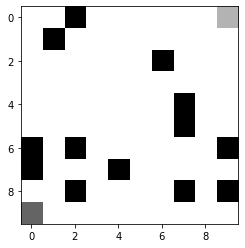

In [24]:
board_length = 10 #10x10 board
num_obstacles = 13 #number of obstacles

#Starting position:
r_h, r_v = (1,1) #Robot position
#Ending position:
g_h,g_v = (board_length,board_length) # Goal position(Top right)

#Generate and see the obstacles on the board:
obstacles = gen_obstacles(board_length, num_obstacles)
visualize([(r_h,r_v),(g_h,g_v)],board_length,obstacles)

In [25]:
solution= robot(r_h, r_v, board_length, obstacles)
#Print the coordinates of steps taken by the robot {(1,1) is the bottom left square.}
print(solution)

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (7, 2), (7, 3), (8, 3), (8, 4), (9, 4), (9, 5), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), ('end', 'end')]


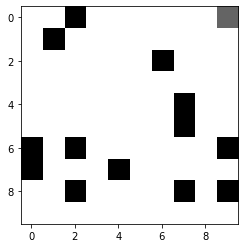

In [27]:
visualize(solution, board_length,obstacles)